In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
from matplotlib import rc

# # 한글 폰트 설정
# plt.rcParams["font.family"] = '나눔고딕'
plt.rcParams['axes.unicode_minus'] = False # 유니코드 마이너스 사용 설정 (깨지는 문제 방지)

# # 나눔글꼴 경로 설정
# font_path = 'C:\\Windows\\Fonts\\gulim.ttf'
font_path = 'C:\Windows\Fonts\gulim.ttc'

# # 폰트 이름 가져오기
font_name = fm.FontProperties(fname=font_path).get_name()

# # 폰트 설정
rc('font', family=font_name)

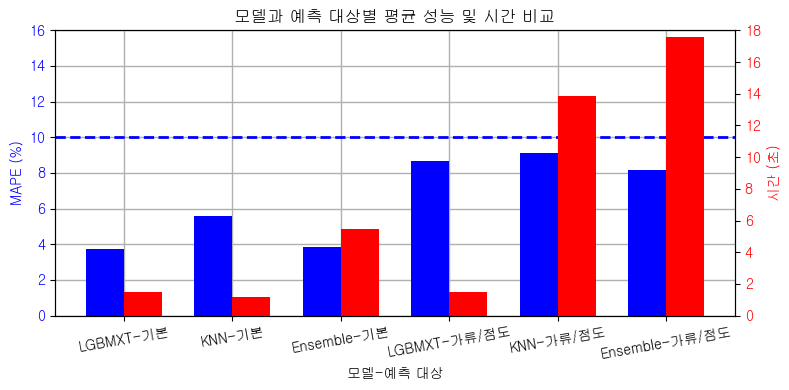

In [13]:
# 데이터 설정
models = ['LGBMXT-기본', 'KNN-기본', 'Ensemble-기본', 'LGBMXT-가류/점도', 'KNN-가류/점도', 'Ensemble-가류/점도']
integrated_values = [3.75, 5.57, 3.85, 8.65, 9.14, 8.17]  # 통합
time_values = [1.49, 1.15, 5.47, 1.50, 13.88, 17.58]  # 시간

# index 및 막대 너비 설정
index = np.arange(len(models))
bar_width = 0.35

# 축 범위 설정을 위한 공통 최소값과 최대값 계산
common_min = 0

# 눈금 설정
ticks_model = np.linspace(common_min, 16, num=9)  # 통합 값에 대한 눈금

fig, ax1 = plt.subplots(figsize=(8, 4))

# 첫 번째 축 (왼쪽)에 대한 막대 그래프 설정
rects1 = ax1.bar(index - bar_width/2, integrated_values, bar_width, color='b', label='MAPE (%)')
ax1.set_ylabel('MAPE (%)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_ylim(common_min, 15)  # 첫 번째 y축 범위 설정
ax1.set_yticks(ticks_model)  # 통합 값에 대한 눈금 설정
ax1.set_axisbelow(True)  # 축과 눈금을 데이터 레이어 아래로 설정
ax1.grid(True, linestyle='-', linewidth=1)  # 진한 눈금선 설정

# 파란색 수평선 추가
ax1.axhline(y=10, color='blue', linewidth=2, linestyle='--')

# 두 번째 축 (오른쪽)에 대한 막대 그래프 설정
ax2 = ax1.twinx()
rects2 = ax2.bar(index + bar_width/2, time_values, bar_width, color='r', label='시간 (초)')
ax2.set_ylabel('시간 (초)', color='r')
ax2.tick_params(axis='y', labelcolor='r')  # 눈금 제거
ax2.set_ylim(common_min, 10)  # 두 번째 y축 범위 설정
ax2.set_yticks(np.linspace(common_min, 18, num=10))  # 통합 값에 대한 눈금 설정
ax2.grid(False)
ax1.set_xlabel('모델-예측 대상')
ax1.set_title('모델과 예측 대상별 평균 성능 및 시간 비교')
ax1.set_xticks(index)
ax1.tick_params(axis='x', labelrotation=10)
ax1.set_xticklabels(models)
# ax1.legend(loc='upper left')
# ax2.legend(loc='upper right')

fig.tight_layout()
plt.show()